# Multiclass and multilabel classification
This notebook is practice and experiments related to multiclass and multilabel classification

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.datasets import make_classification



## 2 features 3 classes

In [2]:
from mlpeople.visualization.classification.single_label import generate_2D_classification_data

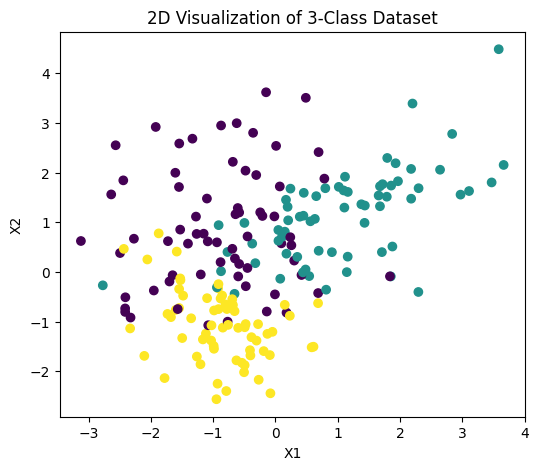

In [3]:
X_mult3, y_mult3 = generate_2D_classification_data()

In [4]:
from mlpeople.visualization.classification.single_label import plot_multiclass_boundaries, plot_multiclass_combined

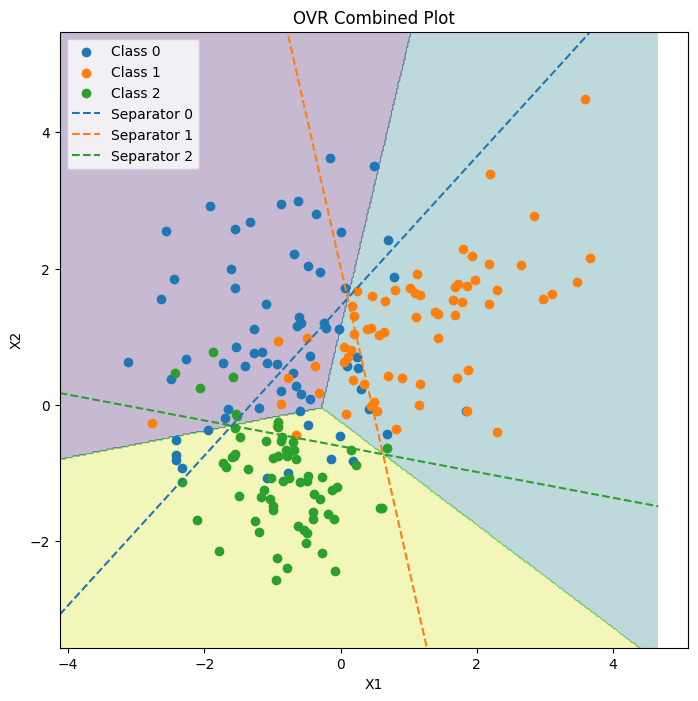

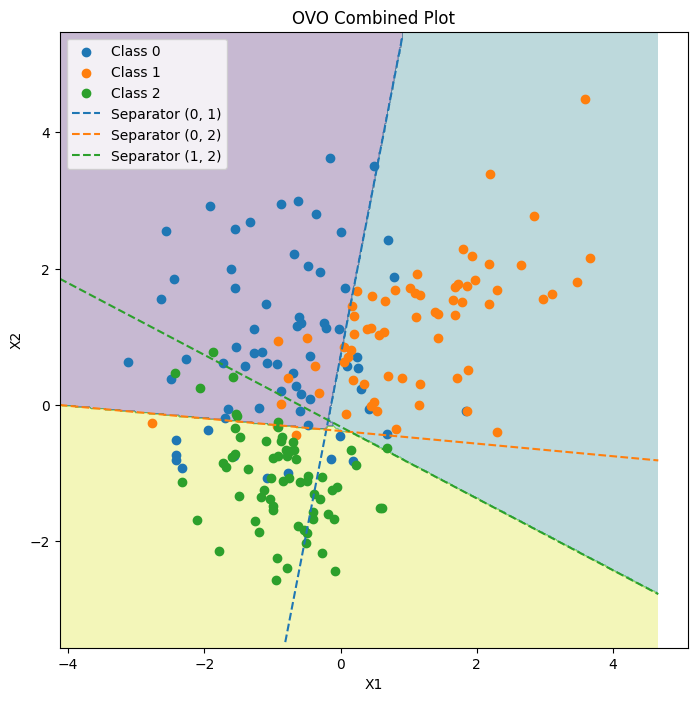

In [5]:
# OvR combined plot
plot_multiclass_combined(X_mult3, y_mult3, classifier_type="ovr")

# OvO combined plot
plot_multiclass_combined(X_mult3, y_mult3, classifier_type="ovo")


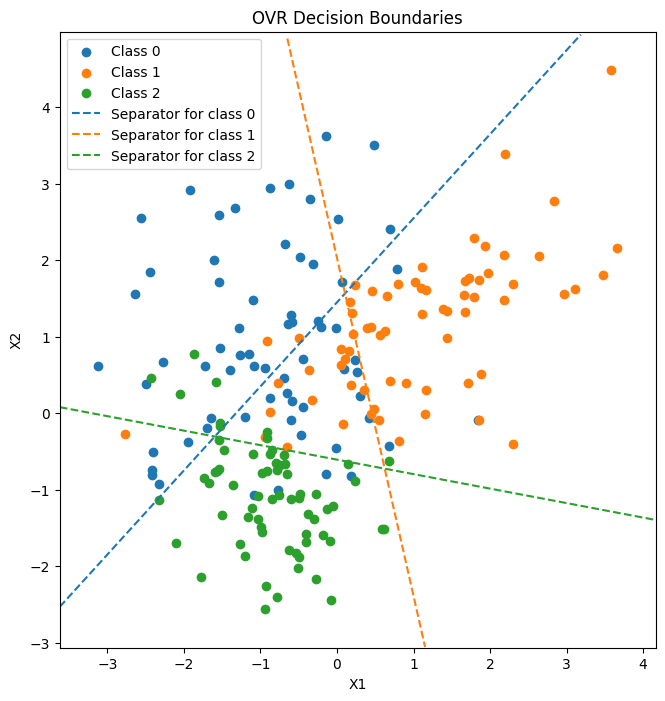

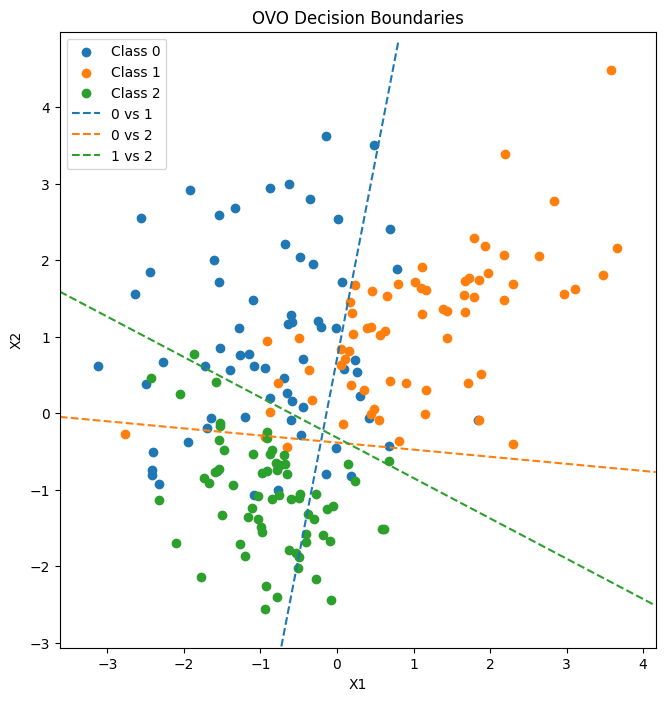

In [6]:
# One-vs-Rest
plot_multiclass_boundaries(X_mult3, y_mult3, classifier_type="ovr", figsize=(14,8))


# One-vs-One
plot_multiclass_boundaries(X_mult3, y_mult3, classifier_type="ovo", figsize=(14,8))



## 4 and more classes

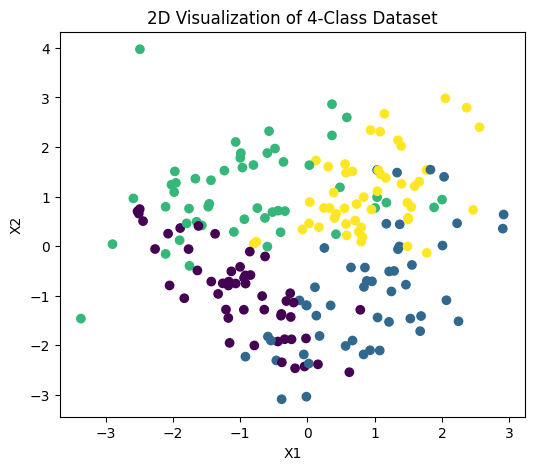

In [7]:
X_mult4, y_mult4 = generate_2D_classification_data(n_classes=4)

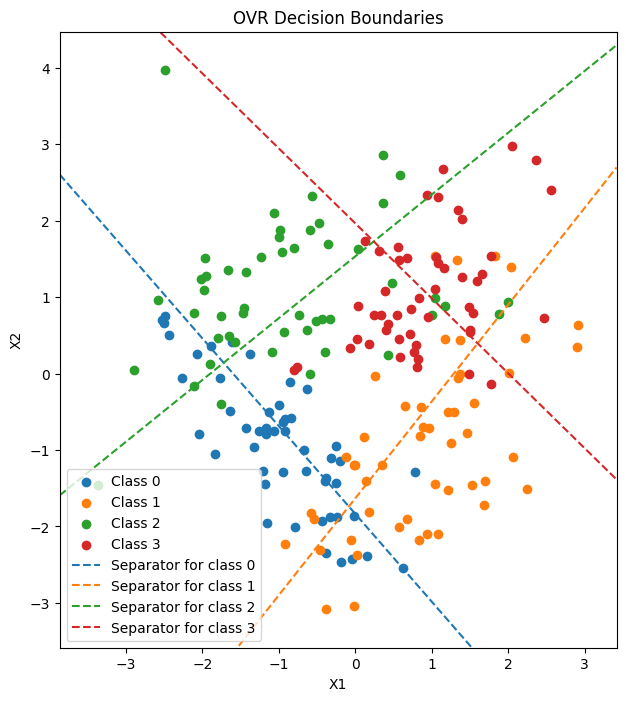

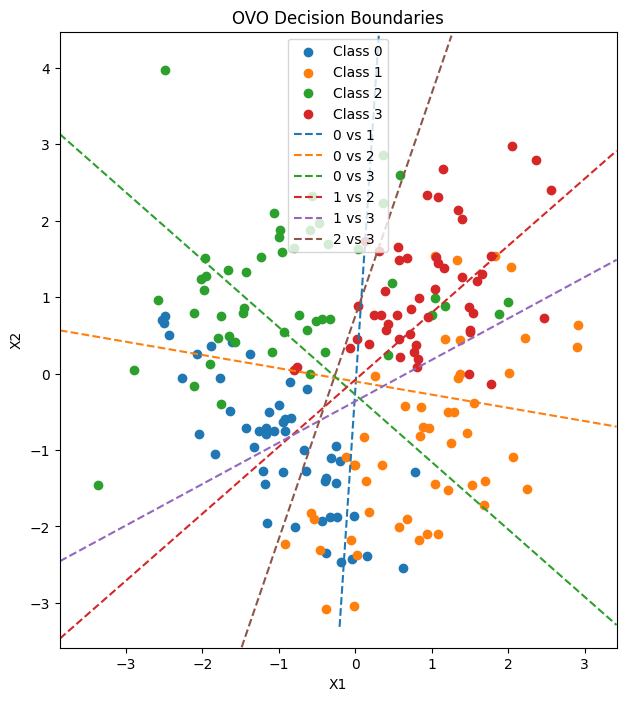

In [8]:
# One-vs-Rest
plot_multiclass_boundaries(X_mult4, y_mult4, classifier_type="ovr", figsize=(14,8))


# One-vs-One
plot_multiclass_boundaries(X_mult4, y_mult4, classifier_type="ovo", figsize=(14,8))

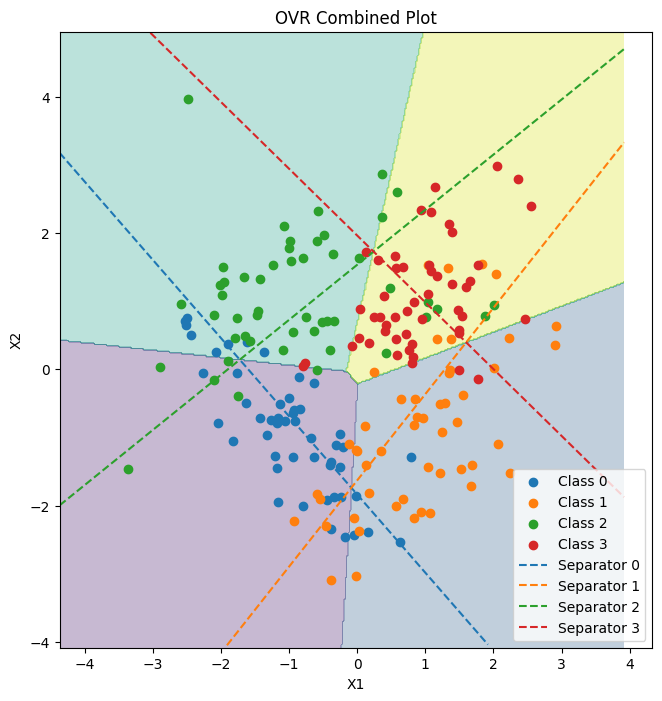

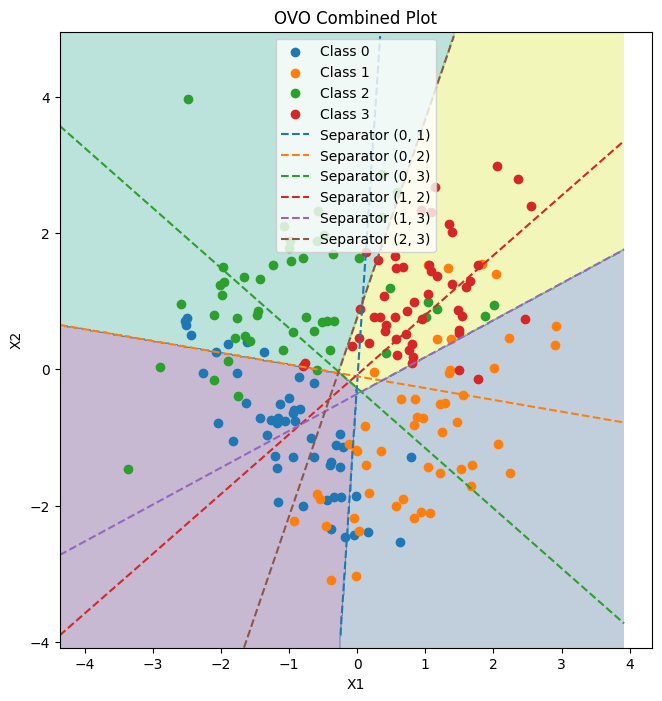

In [9]:
# OvR combined plot
plot_multiclass_combined(X_mult4, y_mult4, classifier_type="ovr")

# OvO combined plot
plot_multiclass_combined(X_mult4, y_mult4, classifier_type="ovo")

## Multilabel Classification

In [10]:
from mlpeople.visualization.classification.multilabel import generate_2D_multilabel_classification_data, plot_multilabel_boundaries

### 30 points data noise vs no noise

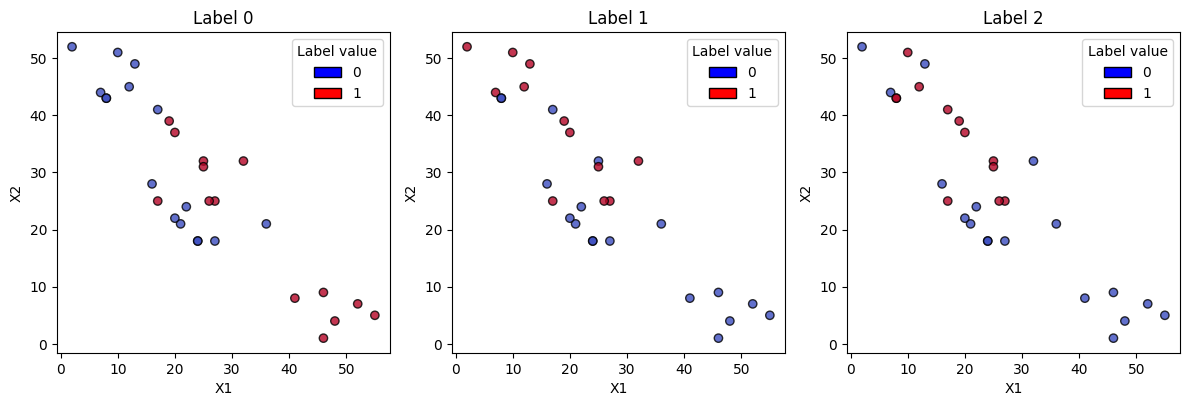

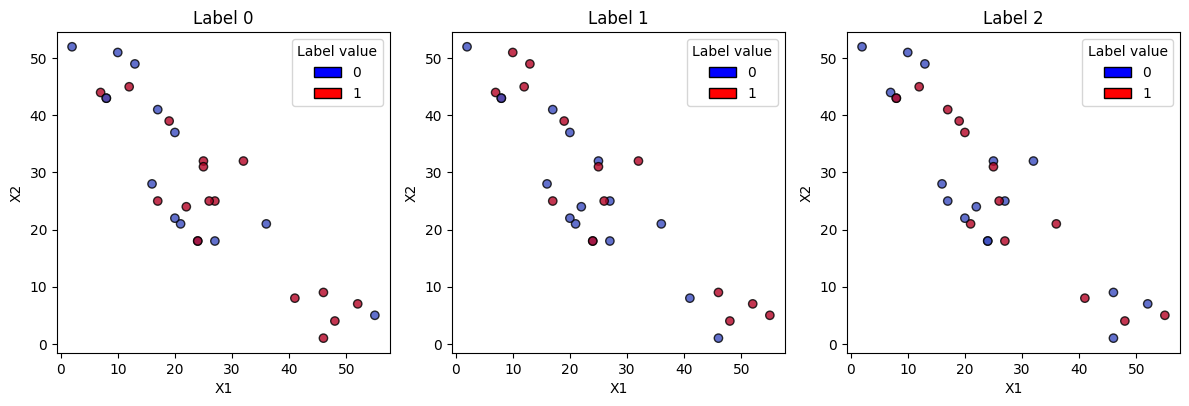

In [11]:
X_multlab3, Y_multlab3 = generate_2D_multilabel_classification_data(n_samples=30, noise=0)
X_multlab3_noise, Y_multlab3_noise = generate_2D_multilabel_classification_data(n_samples=30, noise=0.3)


In [12]:
from sklearn.multioutput import MultiOutputClassifier

multi_clf = MultiOutputClassifier(LogisticRegression())
multi_clf.fit(X_multlab3, Y_multlab3)

multi_clf_noise = MultiOutputClassifier(LogisticRegression())
multi_clf_noise.fit(X_multlab3_noise, Y_multlab3_noise)

,estimator estimator: estimator objectAn estimator object implementing :term:`fit` and :term:`predict`.A :term:`predict_proba` method will be exposed only if `estimator` implementsit.,LogisticRegression()
,"n_jobs n_jobs: int or None, optional (default=None)The number of jobs to run in parallel.:meth:`fit`, :meth:`predict` and :meth:`partial_fit` (if supportedby the passed estimator) will be parallelized for each target.When individual estimators are fast to train or predict,using ``n_jobs > 1`` can result in slower performance dueto the parallelism overhead.``None`` means `1` unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all available processes / threads.See :term:`Glossary ` for more details... versionchanged:: 0.20 `n_jobs` default changed from `1` to `None`.",None
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely propor

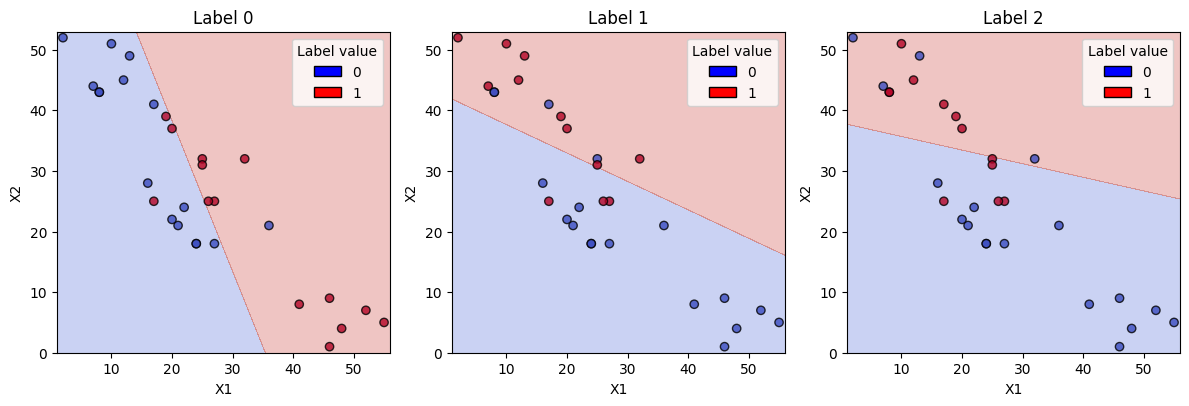

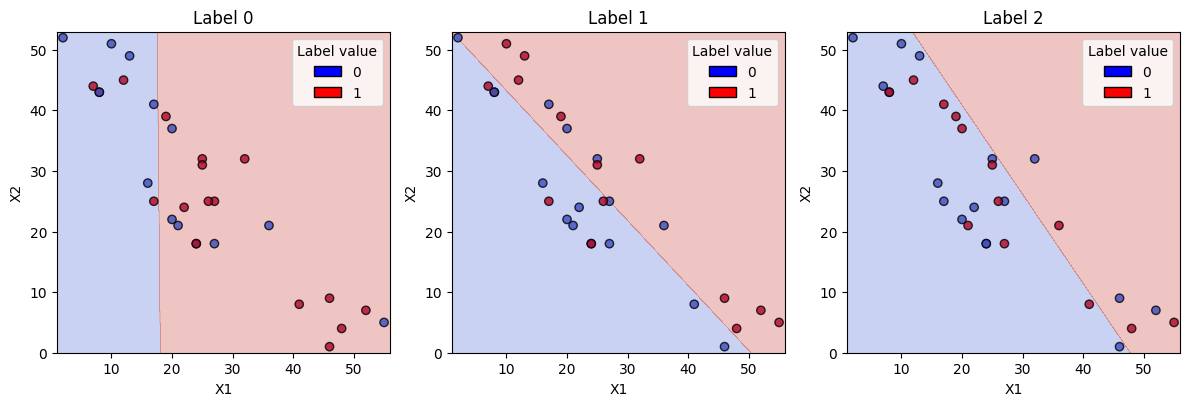

In [13]:
plot_multilabel_boundaries(X_multlab3, Y_multlab3, multi_clf)
plot_multilabel_boundaries(X_multlab3_noise, Y_multlab3_noise, multi_clf_noise)


### OneVsRestClassifier vs MultiOutputClassifier

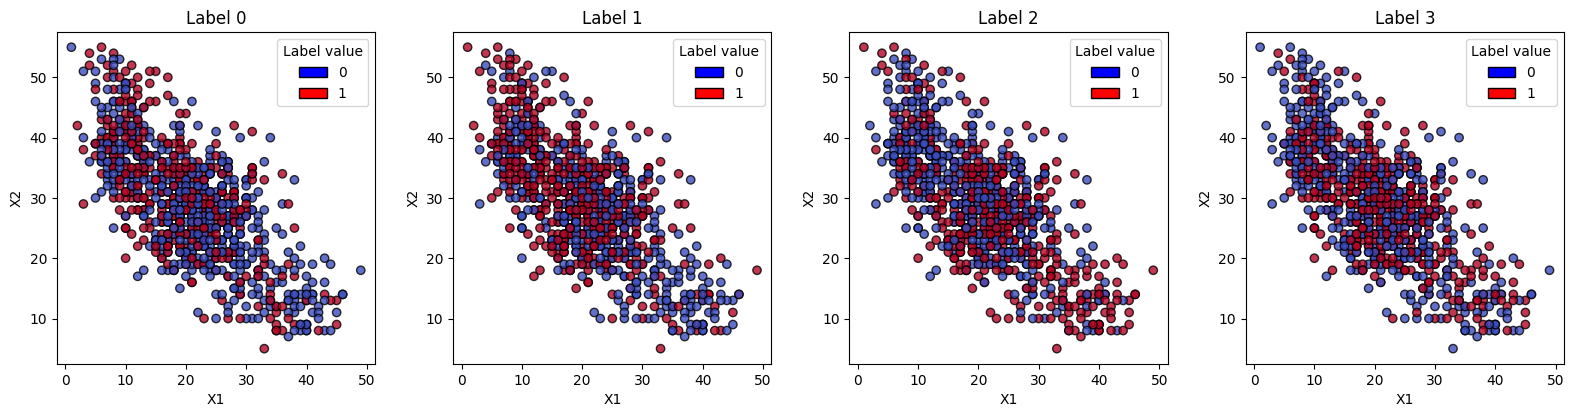

In [14]:
X_multlab4, Y_multlab4 = generate_2D_multilabel_classification_data(n_samples=1000, show_plot=True, n_classes=4, noise=0.3)


In [15]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_multlab4, Y_multlab4, test_size=0.3, random_state=42)

# One-vs-Rest
ovr_clf = OneVsRestClassifier(LogisticRegression())

# One-vs-One (needs flattening for multilabel, will treat as single-label multiclass)
# For multilabel, OneVsOneClassifier is not strictly valid, but let's try column-wise with MultiOutput wrapper
ovo_clf = MultiOutputClassifier(OneVsOneClassifier(LogisticRegression()))

# MultiOutput
multi_clf = MultiOutputClassifier(LogisticRegression())

ovr_clf.fit(X_train, Y_train)
ovo_clf.fit(X_train, Y_train)
multi_clf.fit(X_train, Y_train)


def evaluate_multilabel_report(model, X_test, Y_test, name):
    Y_pred = model.predict(X_test)
    
    print(f"--- {name} ---")
    report = classification_report(
        Y_test,
        Y_pred,
        target_names=[f"Label {i}" for i in range(Y_test.shape[1])],
        zero_division=0
    )
    print(report)

# One-vs-Rest
evaluate_multilabel_report(ovr_clf, X_test, Y_test, "OneVsRestClassifier")

# One-vs-One (with MultiOutput wrapper)
evaluate_multilabel_report(ovo_clf, X_test, Y_test, "OneVsOneClassifier (MultiOutput wrapper)")

# MultiOutputClassifier
evaluate_multilabel_report(multi_clf, X_test, Y_test, "MultiOutputClassifier")



--- OneVsRestClassifier ---
              precision    recall  f1-score   support

     Label 0       0.56      0.17      0.26       134
     Label 1       0.59      0.75      0.66       165
     Label 2       0.58      0.51      0.54       153
     Label 3       0.50      0.55      0.52       139

   micro avg       0.56      0.51      0.53       591
   macro avg       0.56      0.49      0.50       591
weighted avg       0.56      0.51      0.51       591
 samples avg       0.57      0.50      0.49       591

--- OneVsOneClassifier (MultiOutput wrapper) ---
              precision    recall  f1-score   support

     Label 0       0.56      0.17      0.26       134
     Label 1       0.59      0.75      0.66       165
     Label 2       0.58      0.51      0.54       153
     Label 3       0.50      0.55      0.52       139

   micro avg       0.56      0.51      0.53       591
   macro avg       0.56      0.49      0.50       591
weighted avg       0.56      0.51      0.51       591


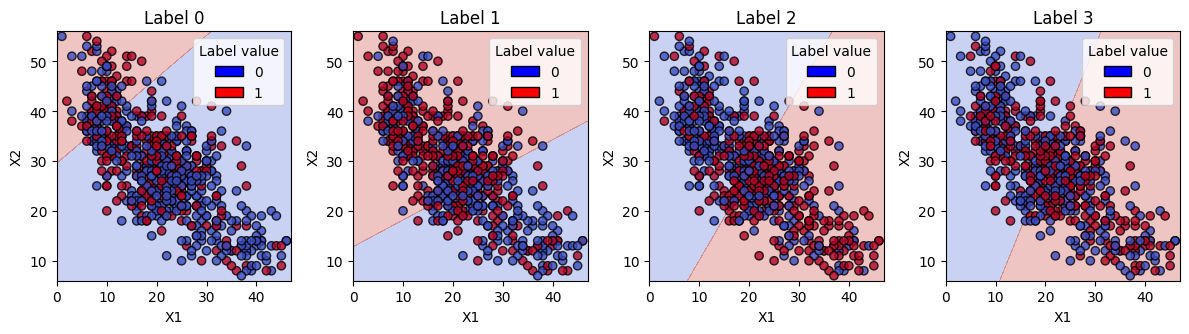

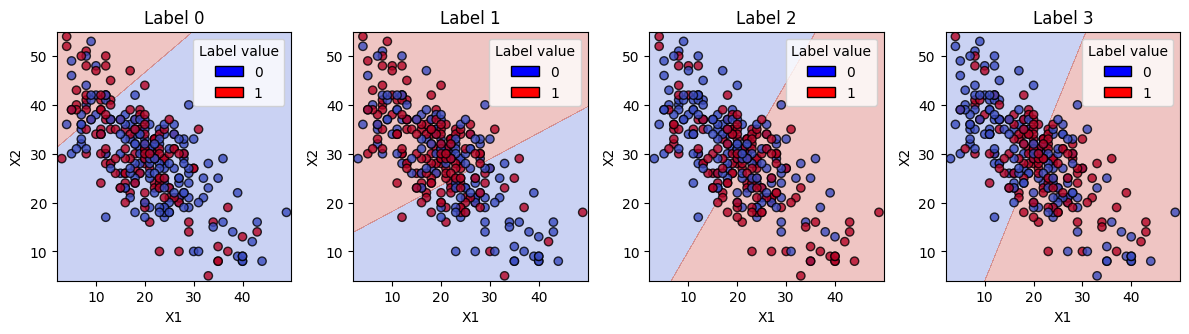

In [16]:
plot_multilabel_boundaries(X_train, Y_train, multi_clf)
plot_multilabel_boundaries(X_test, Y_test, multi_clf)